In [1]:
# import lib
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

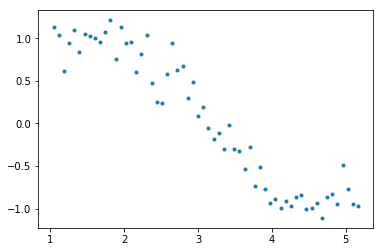

In [2]:
# define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)
y = np.sin(x) + np.random.normal(0, 0.2, len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

In [3]:
for i in range (2,16): # power of 1 is already there
    colname = 'x_%d'%i # new var will be x_power
    data[colname] = data['x']**i
print(data.head())
    

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.132343  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  1.041850  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.618104  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.949380  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.094563  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

In [4]:
# import linear regression model from sk-learn
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    # initialize predictors
    predictors = ['x']
    if power >= 2:
        predictors.extend(['x_%d'%i for i in range(2, power+1)])
    # fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors], data['y'])
    y_pred = linreg.predict(data[predictors])
    # check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'], data['y'], '.')
        plt.title('Plot for power: %d'%power)
    # return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

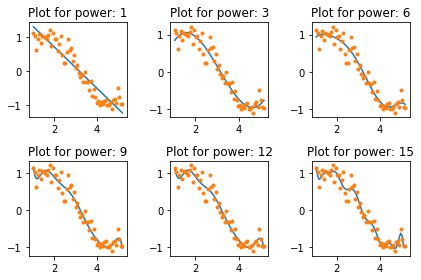

In [5]:
# initialize a dataframe to store the results
col = ['rss', 'intercept'] + ['coef_x_%d'%i for i in range(1, 16)]
ind = ['model_pow_%d'%i for i in range(1, 16)]
coef_matrix_simple = pd.DataFrame(index = ind, columns = col)

#define the powers for which a plot is required
models_to_plot = {1:231, 3:232, 6:233, 9:234, 12:235, 15:236}

# iterate throught all powers and assimilate results
for i in range(1, 16):
    coef_matrix_simple.iloc[i-1, 0:i+2] = linear_regression(data, power = i, models_to_plot = models_to_plot)

In [6]:
# set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,4.2,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,4.2,1.9,-0.59,-0.0037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.9,-1.1,3.1,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.9,-0.05,1.3,-0.32,-0.086,0.018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1.8,3.9,-7,6.1,-2.4,0.41,-0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,1.8,-3.8,13,-13,7.1,-2.1,0.31,-0.018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,1.7,26,-75,92,-59,22,-4.7,0.54,-0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,1.6,58,-1.8e+02,2.5e+02,-1.8e+02,77,-20,3.2,-0.28,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,1.6,2.2e+02,-8.2e+02,1.3e+03,-1.1e+03,6.1e+02,-2.2e+02,49,-7,0.56,-0.02,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,1.6,1.8e+02,-6.5e+02,9.7e+02,-7.9e+02,3.9e+02,-1.2e+02,19,-1.1,-0.18,0.035,-0.0018,NaN,NaN,NaN,NaN,NaN


In [7]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    # fit the model
    ridgereg = Ridge(alpha = alpha, normalize = True)
    ridgereg.fit(data[predictors], data['y'])
    y_pred = ridgereg.predict(data[predictors])
    # check if a plot is to be made for entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'], data['y'], '.')
        plt.title('Plot for alpha: %.3g'%alpha)
    # return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret


/home/damminhtien/anaconda3/envs/tf/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.572933e-17
  overwrite_a=True).T


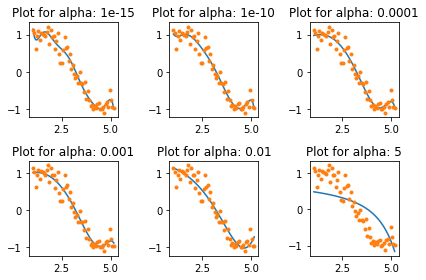

In [8]:
# initialize predictors to be set of 15 powers of x
predictors = ['x']
predictors.extend(['x_%d'%i for i in range(2, 16)])

# set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]

# initialize the dataframe for storing coefficients
col = ['rss', 'intercept'] + ['coef_x_%d'%i for i in range(1, 16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0, 10)]
coef_matrix_ridge = pd.DataFrame(index = ind, columns = col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [9]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,1.6,1.3e+02,-3.9e+02,5e+02,-3e+02,82,3.4,-6.8,0.82,0.22,-0.04,-0.007,0.0013,0.00022,-6.2e-05,4.1e-06,-5e-08
alpha_1e-10,1.6,15,-39,41,-20,3.9,0.22,-0.12,-0.014,0.0027,0.00085,3.2e-05,-2.7e-05,-5.6e-06,2.9e-07,3e-07,-3.1e-08
alpha_1e-08,1.7,1.8,-2.5,2.4,-0.88,0.051,0.02,8.3e-05,-0.00048,-6.9e-05,2.6e-07,1.5e-06,2.5e-07,2.4e-08,4.7e-09,1.1e-09,-6e-10
alpha_0.0001,1.7,0.65,0.44,-0.098,-0.023,-0.0032,-0.00029,4.3e-06,1.1e-05,3.7e-06,9.1e-07,1.9e-07,3.2e-08,4e-09,3.8e-11,-2e-10,-9.1e-11
alpha_0.001,1.7,0.82,0.3,-0.082,-0.02,-0.003,-0.00027,1.1e-05,1.2e-05,3.6e-06,8e-07,1.5e-07,2.2e-08,2.2e-09,-1.3e-10,-1.6e-10,-6.1e-11
alpha_0.01,2.2,1.3,-0.082,-0.052,-0.01,-0.0015,-0.00014,2.3e-07,4.3e-06,1.4e-06,3.2e-07,6e-08,9.7e-09,1.2e-09,4.3e-11,-3.6e-11,-1.7e-11
alpha_1,6.5,0.98,-0.14,-0.019,-0.003,-0.00047,-7e-05,-9.9e-06,-1.3e-06,-1.4e-07,-8.4e-09,1.5e-09,8.2e-10,2.5e-10,6.3e-11,1.5e-11,3.3e-12
alpha_5,15,0.55,-0.059,-0.0085,-0.0014,-0.00024,-4.1e-05,-6.8e-06,-1.1e-06,-1.9e-07,-3.1e-08,-5e-09,-8e-10,-1.2e-10,-1.9e-11,-2.8e-12,-3.9e-13
alpha_10,19,0.41,-0.037,-0.0055,-0.00095,-0.00017,-2.9e-05,-5.2e-06,-9.2e-07,-1.6e-07,-2.9e-08,-5e-09,-8.9e-10,-1.6e-10,-2.8e-11,-5e-12,-8.8e-13
alpha_20,24,0.28,-0.022,-0.0034,-0.0006,-0.00011,-2e-05,-3.6e-06,-6.5e-07,-1.2e-07,-2.2e-08,-4e-09,-7.4e-10,-1.4e-10,-2.5e-11,-4.6e-12,-8.6e-13


In [10]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0), axis = 1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64